In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
table_04=pd.read_excel("2020.04-2020.07(fabric width for HKU).xlsx")
table_07=pd.read_excel("2020.07-2020.10(fabric width for HKU).xlsx")
table_10=pd.read_excel("2020.10-2021.01(fabric width for HKU).xlsx")
table_01=pd.read_excel("2021.01-2021.04(fabric width for HKU).xlsx")
table_all=pd.concat([table_04,table_07,table_10,table_01], axis=0)
table_all.head()

,ETD-出货日期,GF_NO-品名,job_no-排单号,fabric_no-布号,fnsend_no-后整送布单,Quantity-卷长,design_width-工艺门幅,Actual_width-实际门幅,Fabric_Type-布种代码,Warp_Density-经密,...,SUM_Reeding-入筘数,reed_width-筘幅,ReedNo_type-筘号整理类别,Finish_list-整理方式,Mercerizing-丝光,Wash_Method-水洗方式,FabricNumber-织物组织类别,Color_Type-是否本白,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前)
0,2020-04,DC4040-19D898KMY,PT202189,Q21112220001,FA2003190106,94.8,58.5,58.5,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
1,2020-04,DC4040-19D898KMY,PT202189,Q21112220002,FA2003190106,93.0,58.5,58.8,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
2,2020-04,DC4040-19D898KMY,PT202189,Q21112220004,FA2003190106,55.5,58.5,58.5,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
3,2020-04,DC4040-19D898KMY,PT202189,Q21112220005,FA2003190106,94.8,58.5,59.0,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
4,2020-04,DC4040-19D898KMY,PT202189,Q21112220006,FA2003190106,75.0,58.5,58.8,D,165.0,...,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0


In [4]:
drop_cols1=['ETD-出货日期','GF_NO-品名','job_no-排单号','fabric_no-布号','fnsend_no-后整送布单','Quantity-卷长','Actual_width-实际门幅']
table_train_X=table_all.drop(drop_cols1,axis=1)

In [5]:
drop_cols_prod=['GF_NO']
table_prod_X=pd.read_excel("new+batch+testing+data+for+fabric+width.xlsx").drop(drop_cols_prod,axis=1)
raw_data=pd.concat([table_train_X,table_prod_X], axis=0)
raw_data.head()

,design_width-工艺门幅,Fabric_Type-布种代码,Warp_Density-经密,Weft_Density-纬密,F_Actual_count-纬向纱支,W_Actual_count-经向纱支,Component-成分,Reed_NO-筘号,SUM_Reeding-入筘数,reed_width-筘幅,ReedNo_type-筘号整理类别,Finish_list-整理方式,Mercerizing-丝光,Wash_Method-水洗方式,FabricNumber-织物组织类别,Color_Type-是否本白,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前)
0,58.5,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
1,58.5,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
2,58.5,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
3,58.5,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0
4,58.5,D,165.0,95.0,40,40,100.0% CTN,140.0,2#,69.46,B,21+31+171+,18BE,NW,15,N,0,-2.0


In [6]:
print('Number of row and columns in train+test set: ', table_train_X.shape)
print('Number of row and columns in production set: ', table_prod_X.shape)
print('Total Number of row and columns', raw_data.shape)

Number of row and columns in train+test set:  (308249, 18)
Number of row and columns in production set:  (181, 18)
Total Number of row and columns (308430, 18)


In [7]:
#clean the X
#fabric_type to int 
Fabric_Type_dummpy = pd.get_dummies(raw_data['Fabric_Type-布种代码'],drop_first=False,prefix='Fabric_Type')
Component_dummpy = pd.get_dummies(raw_data['Component-成分'],drop_first=False,prefix='Component')
SUM_Reeding_dummpy = pd.get_dummies(raw_data['SUM_Reeding-入筘数'],drop_first=False,prefix='SUM_Reeding')
ReedNo_type_dummpy = pd.get_dummies(raw_data['ReedNo_type-筘号整理类别'],drop_first=False,prefix='ReedNo_type')
Finish_list_dummpy = pd.get_dummies(raw_data['Finish_list-整理方式'],drop_first=False,prefix='Finish_list')
Mercerizing_dummpy = pd.get_dummies(raw_data['Mercerizing-丝光'],drop_first=False,prefix='Mercerizing')
Wash_Method_dummpy = pd.get_dummies(raw_data['Wash_Method-水洗方式'],drop_first=False,prefix='Wash_Method')
Color_Type_dummpy = pd.get_dummies(raw_data['Color_Type-是否本白'],drop_first=False,prefix='Color_Type')
F_Actual_count_dummpy = pd.get_dummies(raw_data['F_Actual_count-纬向纱支'],drop_first=False,prefix='F_Actual_count')
W_Actual_count_dummpy = pd.get_dummies(raw_data['W_Actual_count-经向纱支 '],drop_first=False,prefix='W_Actual_count')
dummpy_data = pd.concat([Fabric_Type_dummpy, Component_dummpy, SUM_Reeding_dummpy, ReedNo_type_dummpy, Finish_list_dummpy, Mercerizing_dummpy, Wash_Method_dummpy, Color_Type_dummpy, F_Actual_count_dummpy, W_Actual_count_dummpy], axis =1)
dummpy_data.head()

,Fabric_Type_C,Fabric_Type_D,Fabric_Type_H,Fabric_Type_J,Fabric_Type_K,Fabric_Type_O,Fabric_Type_P,Fabric_Type_S,Component_100.0% CTN,Component_100.0% LINEN,...,W_Actual_count_70+30,W_Actual_count_70+40,W_Actual_count_70+50,W_Actual_count_70+60\30D,W_Actual_count_8,W_Actual_count_80,W_Actual_count_80+40+15,W_Actual_count_80+40+20,W_Actual_count_85,W_Actual_count_88D/36F
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
drop_cols_convert=['Fabric_Type-布种代码','Component-成分','SUM_Reeding-入筘数','ReedNo_type-筘号整理类别','Finish_list-整理方式','Mercerizing-丝光','Wash_Method-水洗方式','Color_Type-是否本白','F_Actual_count-纬向纱支', 'W_Actual_count-经向纱支 ']
data=raw_data.drop(drop_cols_convert,axis=1)

In [9]:
data = pd.concat([data,dummpy_data],axis =1)
data.head()

,design_width-工艺门幅,Warp_Density-经密,Weft_Density-纬密,Reed_NO-筘号,reed_width-筘幅,FabricNumber-织物组织类别,Is_Piece_Dye-是否CPB,Shrinkage-纬向缩水标准(分档前),Fabric_Type_C,Fabric_Type_D,...,W_Actual_count_70+30,W_Actual_count_70+40,W_Actual_count_70+50,W_Actual_count_70+60\30D,W_Actual_count_8,W_Actual_count_80,W_Actual_count_80+40+15,W_Actual_count_80+40+20,W_Actual_count_85,W_Actual_count_88D/36F
0,58.5,165.0,95.0,140.0,69.46,15,0,-2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,58.5,165.0,95.0,140.0,69.46,15,0,-2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,58.5,165.0,95.0,140.0,69.46,15,0,-2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,58.5,165.0,95.0,140.0,69.46,15,0,-2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,58.5,165.0,95.0,140.0,69.46,15,0,-2.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
actual_width = table_all['Actual_width-实际门幅']
design_width = table_all['design_width-工艺门幅']

In [11]:
actual_width.head()

0    58.5
1    58.8
2    58.5
3    59.0
4    58.8
Name: Actual_width-实际门幅, dtype: float64

In [12]:
#split the train dataset and test dataset
X = data.head(table_train_X.shape[0]).values
Y = actual_width.values.ravel() - design_width.values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=1234)
print('Number of row and columns in X train set:', X_train.shape)
print('Number of row and columns in Y train set:', Y_train.shape)
print('Number of row and columns in X test set:', X_test.shape)
print('Number of row and columns in Y test set:', Y_test.shape)

Number of row and columns in X train set: (246599, 647)
Number of row and columns in Y train set: (246599,)
Number of row and columns in X test set: (61650, 647)
Number of row and columns in Y test set: (61650,)


In [13]:
Y

array([ 0. ,  0.3,  0. , ..., -1.5, -2. , -2. ])

In [14]:
'''模型调参'''
#参数选择,这部分很耗时，所以暂时不要运行
# from sklearn.model_selection import RandomizedSearchCV
# criterion=['mse','mae']
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'criterion':criterion,
#                 'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# #构建模型
# clf= RandomForestRegressor()
# clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
#                               n_iter = 10,  
#                               cv = 3, verbose=2, random_state=42, n_jobs=1)
# #回归
# clf_random.fit(X_train, Y_train)
# print (clf_random.best_params_)

'模型调参'

In [15]:
%%time
import joblib
from pathlib import Path
from sklearn.datasets import load_iris

criterion='mse'
bootstrap=False
max_features='sqrt'
max_depth=20
min_samples_split=10
n_estimators=1200
min_samples_leaf=2


joblib_name = Path(f"discrepency_random_forest_{criterion}_{n_estimators}_{max_features}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{bootstrap}.joblib") 
joblib_name_file = Path(joblib_name)

#load or train the rf
if joblib_name_file.is_file():
    rf = joblib.load(joblib_name)
    print('loaded trained model from', joblib_name)
else:
    rf=RandomForestRegressor(criterion=criterion,bootstrap=bootstrap,max_features=max_features, max_depth=max_depth,min_samples_split=min_samples_split, n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, Y_train)
    joblib.dump(rf, joblib_name)
    print('dumpped trained model to', joblib_name)

dumpped trained model to discrepency_random_forest_mse_1200_sqrt_20_10_2_False.joblib
CPU times: user 45min 50s, sys: 2.78 s, total: 45min 53s
Wall time: 45min 54s


In [16]:
%%time
#Predict the train and test result 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

CPU times: user 1min 3s, sys: 512 ms, total: 1min 4s
Wall time: 1min 4s


In [17]:
# Extract single tree
estimator = rf.estimators_[0]

from sklearn.tree import export_graphviz
from subprocess import call
# Export as dot file
export_graphviz(estimator, out_file='actual_width_tree_0.dot', 
                feature_names = data.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'actual_width_tree_0.dot', '-o', 'actual_width_tree_0.png', '-Gdpi=1800'])

0

In [18]:
#指标重要性
feature=data.columns
feature_list = []
importance_list = []
for i in range(len(feature)):
    if rf.feature_importances_.round(2)[i]>= 0.03:#将变量重要性大于0.03的显示出来
        feature_list.append(feature[i])
        importance_list.append(rf.feature_importances_.round(2)[i])

In [19]:
# plot the feature importance
from pyecharts.charts import Bar
from pyecharts import options as opts
bar = (
    Bar()
    .add_xaxis(feature_list)
    .add_yaxis("importance", importance_list)
    .set_global_opts(title_opts=opts.TitleOpts(title="actual_width feature importance"))
)
bar.render_notebook()

In [20]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ("决策树模型评估--训练集：")
print ('训练r^2:',rf.score(X_train,Y_train))
print ('均方差',mean_squared_error(Y_train,y_train_pred))
print ('绝对差',mean_absolute_error(Y_train,y_train_pred))
print ('解释度',explained_variance_score(Y_train,y_train_pred))

print ("决策树模型评估--验证集：")
print ('验证r^2:',rf.score(X_test,Y_test))
print ('均方差',mean_squared_error(Y_test,y_test_pred))
print ('绝对差',mean_absolute_error(Y_test,y_test_pred))
print ('解释度',explained_variance_score(Y_test,y_test_pred))

决策树模型评估--训练集：
训练r^2: 0.4905064602680944
均方差 0.21868609401741268
绝对差 0.3575114914386966
解释度 0.4905064602680944
决策树模型评估--验证集：
验证r^2: 0.49433507299239143
均方差 0.22008191519332052
绝对差 0.3588434563220078
解释度 0.49434238856971446


In [21]:
all_data_pred = rf.predict(X)
all_data_true = Y
pred_mean = np.mean(all_data_pred)
pred_std = np.std(all_data_pred)
true_mean = np.mean(all_data_true)
true_std = np.std(all_data_true)
print(pred_mean,pred_std)
print(true_mean,true_std)

-0.6077128115548646 0.40451433143352433
-0.6073559362722993 0.6560678320659102


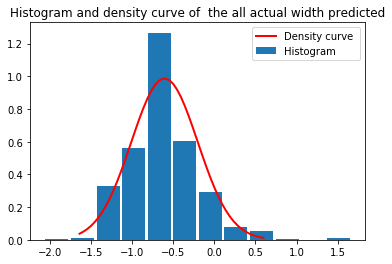

In [22]:
import scipy.stats as st 
s=np.random.normal(pred_mean, pred_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(pred_mean,  pred_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(all_data_pred,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all actual width predicted")
plt.legend()
plt.show()

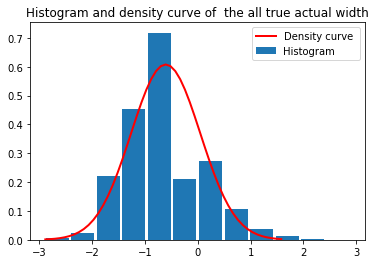

In [23]:
s=np.random.normal(true_mean, true_std, 500)
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(true_mean,  true_std).pdf(s_fit), lw=2, c='r',label = "Density curve ")
plt.hist(all_data_true,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of  the all true actual width")
plt.legend()
plt.show()

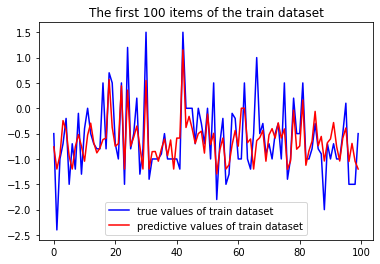

In [24]:
t = np.arange(100)
plt.plot(t,Y_train[0:100],color="blue",label='true values of train dataset')
plt.plot(t,y_train_pred[0:100],color="red",label='predictive values of train dataset')
plt.legend()
plt.title('The first 100 items of the train dataset')
plt.show()#预测效果好

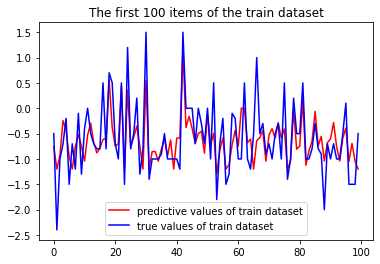

In [25]:
t = np.arange(100)
plt.plot(t,y_train_pred[0:100],color="red",label='predictive values of train dataset')
plt.plot(t,Y_train[0:100],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 100 items of the train dataset')
plt.show()#预测效果好

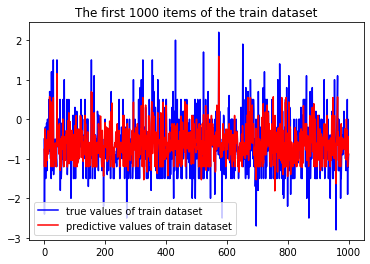

In [26]:
#the predicted results display
t = np.arange(1000)
plt.plot(t,Y_train[0:1000],color="blue",label='true values of train dataset')
plt.plot(t,y_train_pred[0:1000],color="red",label='predictive values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

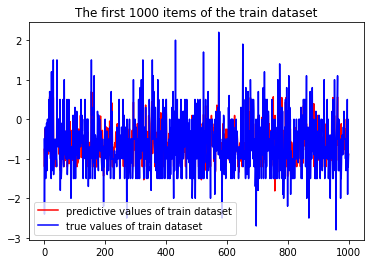

In [27]:
#the predicted results display
t = np.arange(1000)
plt.plot(t,y_train_pred[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,Y_train[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

/Users/kzhao/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


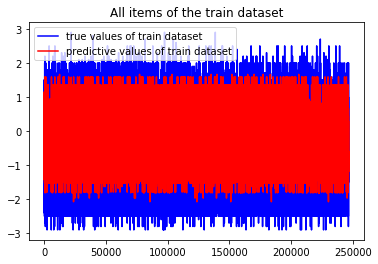

In [28]:
#the predicted results display
t = np.arange(Y_train.shape[0])
plt.plot(t,Y_train,color="blue",label='true values of train dataset')
plt.plot(t,y_train_pred,color="red",label='predictive values of train dataset')
plt.legend()
plt.title('All items of the train dataset')
plt.show()

/Users/kzhao/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


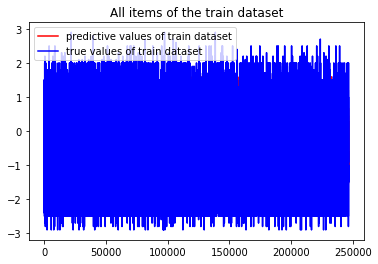

In [29]:
#the predicted results display
t = np.arange(Y_train.shape[0])
plt.plot(t,y_train_pred,color="red",label='predictive values of train dataset')
plt.plot(t,Y_train,color="blue",label='true values of train dataset')
plt.legend()
plt.title('All items of the train dataset')
plt.show()

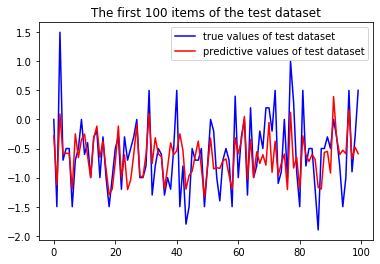

In [30]:
t = np.arange(100)
plt.plot(t,Y_test[0:100],color="blue",label='true values of test dataset')
plt.plot(t,y_test_pred[0:100],color="red",label='predictive values of test dataset')
plt.legend()
plt.title('The first 100 items of the test dataset')
plt.show()

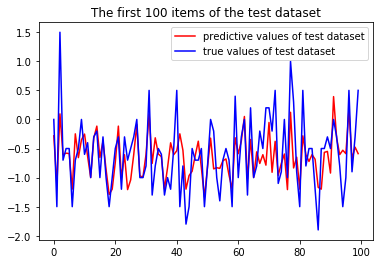

In [31]:
t = np.arange(100)
plt.plot(t,y_test_pred[0:100],color="red",label='predictive values of test dataset')
plt.plot(t,Y_test[0:100],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 100 items of the test dataset')
plt.show()

Text(0.5, 1.0, 'The first 1000 items of the test dataset')

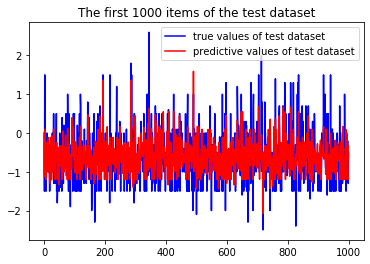

In [32]:
t = np.arange(1000)
plt.plot(t,Y_test[0:1000],color="blue",label='true values of test dataset')
plt.plot(t,y_test_pred[0:1000],color="red",label='predictive values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')

Text(0.5, 1.0, 'The first 1000 items of the test dataset')

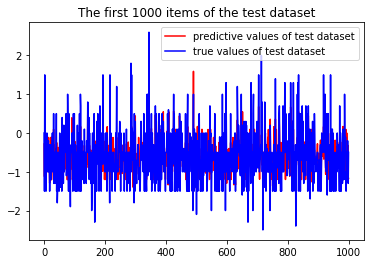

In [33]:
t = np.arange(1000)
plt.plot(t,y_test_pred[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,Y_test[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')

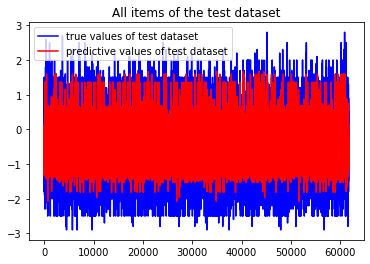

In [34]:
t = np.arange(Y_test.shape[0])
plt.plot(t,Y_test,color="blue",label='true values of test dataset')
plt.plot(t,y_test_pred,color="red",label='predictive values of test dataset')
plt.legend()
plt.title('All items of the test dataset')
plt.show()

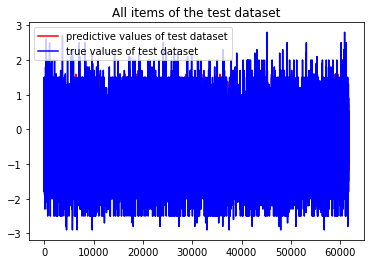

In [35]:
t = np.arange(Y_test.shape[0])
plt.plot(t,y_test_pred,color="red",label='predictive values of test dataset')
plt.plot(t,Y_test,color="blue",label='true values of test dataset')
plt.legend()
plt.title('All items of the test dataset')
plt.show()

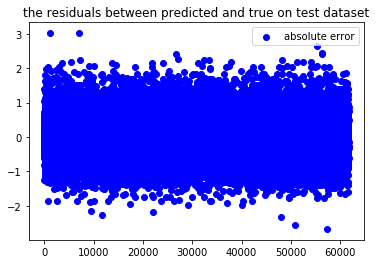

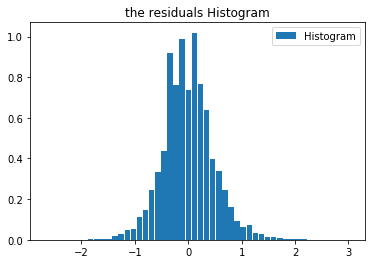

In [36]:
t = np.arange(Y_test.shape[0])
residuals = Y_test.ravel()-y_test_pred.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()#这个误差结果比较小，全部在3以内

/Users/kzhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


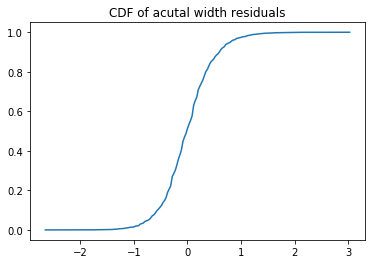

array([[-2.65444627,  0.00001622],
       [-2.62588324,  0.00001622],
       [-2.5973202 ,  0.00001622],
       [-2.56875717,  0.00001622],
       [-2.54019414,  0.00003244],
       [-2.51163111,  0.00003244],
       [-2.48306808,  0.00003244],
       [-2.45450505,  0.00003244],
       [-2.42594201,  0.00003244],
       [-2.39737898,  0.00003244],
       [-2.36881595,  0.00003244],
       [-2.34025292,  0.00003244],
       [-2.31168989,  0.00004866],
       [-2.28312685,  0.00004866],
       [-2.25456382,  0.00006488],
       [-2.22600079,  0.00006488],
       [-2.19743776,  0.00006488],
       [-2.16887473,  0.0000811 ],
       [-2.14031169,  0.00009732],
       [-2.11174866,  0.00009732],
       [-2.08318563,  0.00009732],
       [-2.0546226 ,  0.00009732],
       [-2.02605957,  0.00009732],
       [-1.99749653,  0.00009732],
       [-1.9689335 ,  0.00011354],
       [-1.94037047,  0.00012976],
       [-1.91180744,  0.00016221],
       [-1.88324441,  0.00017843],
       [-1.85468138,

In [37]:
H,X1 = np.histogram(Y_test.ravel()-y_test_pred.ravel(), bins = 200, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx

plt.plot(X1[1:], F1)
plt.title('CDF of acutal width residuals')
plt.show()
np.set_printoptions(suppress=True)
cdf = (X1[1:].reshape(X1[1:].shape[0],1),np.transpose([F1]) )
np.hstack(cdf)

In [38]:
print('[',cdf[0][84],',',cdf[0][102],']:', cdf[1][102]- cdf[1][84])
print('[',cdf[0][76],',',cdf[0][111],']:', cdf[1][76]- cdf[1][111])
print('[',cdf[0][67],',',cdf[0][120],']:', cdf[1][67]- cdf[1][120])

[ [-0.25515159] , [0.25898299] ]: [0.45672344]
[ [-0.48365584] , [0.51605027] ]: [-0.75239254]
[ [-0.74072313] , [0.77311756] ]: [-0.89712895]


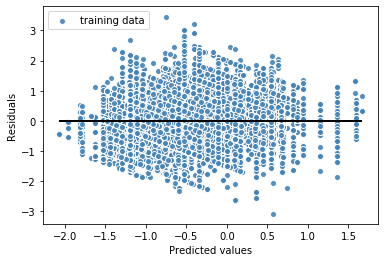

In [39]:
#残差分布图  r
plt.scatter(y_train_pred,Y_train-y_train_pred, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), lw=2, color='black')
plt.show()

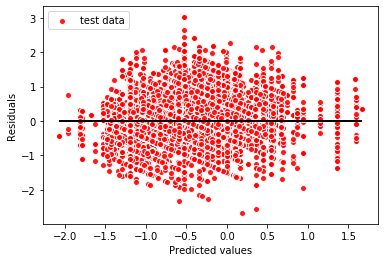

In [40]:
#残差分布图  r
plt.scatter(y_test_pred,Y_test-y_test_pred, c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), lw=2, color='black')
plt.show()

In [41]:
X_prod = data.tail(table_prod_X.shape[0]).values
Y_prod_pred=rf.predict(X_prod)

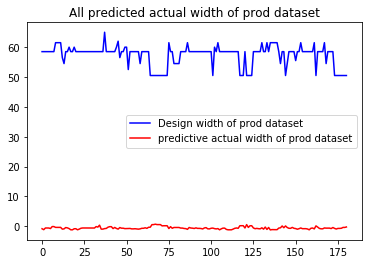

In [42]:
#the predicted prod results display
t = np.arange(Y_prod_pred.shape[0])
plt.plot(t,X_prod[:, 0],color="blue",label='Design width of prod dataset')
plt.plot(t,Y_prod_pred,color="red",label='predictive actual width of prod dataset')
plt.legend()
plt.title('All predicted actual width of prod dataset')
plt.show()

In [43]:
Y_prod_pred_df = pd.DataFrame(Y_prod_pred, columns=['discrepency'])
Y_prod_pred_df.to_excel("discrepency_output.xlsx", index = False, sheet_name='discrepency prediction') 